# AB Test
This project analyses the results of an A/B test run by an e-commerce website. The goal is to work through this notebook to help the company understand if they should implement the new page or keep the old page based on the ads CTR metrics.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']= False

In [7]:
data = pd.read_csv('ab_data.csv')
data["date"] = data.timestamp.str[:10]
data.head()

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


# 1. Metrics Determination
The first category of metrics: duration of average stay，make sure that related metrics does not fall beyond the normal range of fluctuations. We use the difference in duration of average stay as a statistic.

The second category of metrics: ads click through rate = the number of click users / the number of exposed users. We use the difference between the two groups of ads click rates as a statistic

# 2. Event Tracking 
Data collection for ads exposure and ads click:
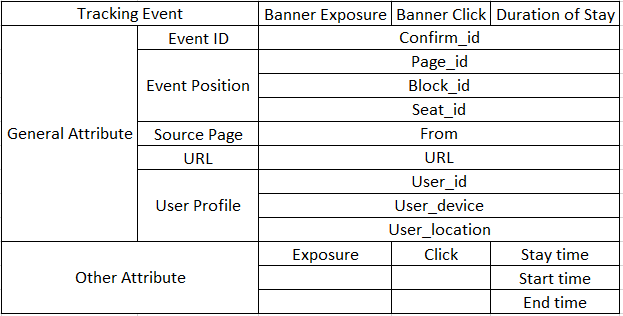!

# 3. Hypothesis H0,H1 Determination
Group A is treatment group, Group B is the control group

The first category of metrics:
The duration of stay time in the treatment group is not significantly shorter than that in the control group.


H0: control_stime - treatment_stime >= 2 * std(control_stime) 

H1: control_stime - treatment_stime < 2 *std(control_stime)

<br>      
      
The second category of metrics:
Ads CTR in the treatment group is significantly higher than those in the control group.


H0: treatment_p- control_p <=0

H1: treatment_p- control_p >0 

# 4. Significance Level α & β

Type I error, α= 0.05  
Type II error, β= 0.2


In [8]:
alpha =0.05
beta =0.2

# 5. Sample Size Calculation
There is no data for the first category of metrics, we do not calculate it, only the second category of metrics is calculated.

From the H0 and H1 of the second category of metrics, we know that the one-sided (right side) test. From the statistical hypothesis testing, we know that it is the proportion metrics, so the calculation formula of the statistic is as follows:

$$
n_A = kn_B\ and\ n_B = (\frac{\pi_A(1-\pi_A)}{k} + \pi_B(1-\pi_B))(\frac{z_{1- \alpha} +  z_{1-\beta}}{\pi_A - \pi_B} )^2
$$

where treatment_p = $p_A$,   control_p = $p_B$

In [9]:
# calculate control_p
# Calculate the ads CTR in the control group
control_p = data.converted[(data.group=="control") & (data.landing_page=="old_page")].mean()
control_p

0.1203863045004612

In [10]:
# calculate p0*(1-p0) = 
control_p_1_control_p = control_p * (1-control_p)
control_p_1_control_p

0.10589344218918344

In [11]:
# calculate Z1-alpha
Z1_alpha = stats.norm.isf(alpha,loc=0,scale=1)
Z1_alpha

1.6448536269514729

In [12]:
# calculate Z1-beta
# probability of Type II error
Z1_beta = stats.norm.isf(beta,loc=0,scale=1)
Z1_beta

0.8416212335729142

In [13]:
# H1 is treatment_p- control_p >0，In order to calculate the sample size, a non-zero value needs to be specified here. 
# The smaller the absolute value of this value, the larger the sample size.， 
# treatment_p- control_p >0.015
# We specify a small value 0.015
treatment_p = control_p + 0.015
p_p0 = treatment_p - control_p
print(treatment_p,p_p0)

0.13538630450046119 0.014999999999999986


In [14]:
# p * (1-p)
p_1_p = treatment_p * (1-treatment_p)
p_1_p

0.11705685305416959

In [15]:
n = (control_p_1_control_p + p_1_p) * ((Z1_alpha +Z1_beta) / p_p0 )**2
n

6126.235378834391

In [16]:
#Check our sample size meets the minimum sample size
data.groupby(["group","landing_page"])["user_id"].count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: user_id, dtype: int64

In [17]:
#Check our sample size meets the minimum sample size
dd=data.groupby(["group","landing_page","date"],as_index=False)["user_id"].count()
dd[((dd.group =="control") & (dd.landing_page=="old_page"))|((dd.group =="treatment") & (dd.landing_page=="new_page"))]

,group,landing_page,date,user_id
23,control,old_page,2017-01-02,2859
24,control,old_page,2017-01-03,6590
25,control,old_page,2017-01-04,6578
26,control,old_page,2017-01-05,6427
27,control,old_page,2017-01-06,6606
28,control,old_page,2017-01-07,6604
29,control,old_page,2017-01-08,6687
30,control,old_page,2017-01-09,6628
31,control,old_page,2017-01-10,6654
32,control,old_page,2017-01-11,6688


# 6. Statistical Testing

1. Calculate the statistics

2. Calculate the significance P value of the statistic

3. Compare the P value of the statistic with the significance level of α to make a decision

 

In [18]:
df = data[data.date=='2017-01-03'].groupby(["group","landing_page"],as_index=False)["converted"].mean()
df

,group,landing_page,converted
0,control,new_page,0.106383
1,control,old_page,0.113809
2,treatment,new_page,0.113781
3,treatment,old_page,0.097826


In [19]:
# We only need the proportion of old pages in the control group and new pages in the treatment group
statistic_t = df.converted[2] - df.converted[1]

to calculate$$ \sigma = \sqrt {\frac{p_A (1-p_A)}{n_A}+\frac{p_B (1-p_B)}{n_B}} $$

In [20]:
# calculate the size in order to find the variance
n1 = data[data.date=='2017-01-03'].converted[(data.group=="control") & (data.landing_page=="old_page")].size
n2 = data[data.date=='2017-01-03'].converted[(data.group=="treatment") & (data.landing_page=="new_page")].size
print(n1,n2)

6590 6618


In [21]:
sigma  = np.sqrt(df.converted[2] * (1-df.converted[2])/n2  + df.converted[1] * (1-df.converted[1])/n1 )
sigma

0.005526379176809786

H0 decides the rejection region, <= means the rejection region is on the right side, so, using stats.norm.cdf. We only can find the cumulative probability on the left side, we need to use 1-

H0: treatment_p- control_p <=0

In [22]:
statistic_p = 1-stats.norm.cdf(statistic_t,0,sigma)
statistic_p

0.5020359187180234

In [23]:
if(statistic_p > alpha):
    print("p-value > α, treatment group CTR <= control group")
else:
    print("p-value < α, treatment group CTR > control group")

p-value > α, treatment group CTR <= control group


# Conclusion
The p-value is 0.502 and it failed to reject the null hypothesis, which means the treatment group's CTR was less or equal to the control group's CTR. Thus, the e-commerce company should not implement the new page.